In [ ]:
#Import necessary library
import numpy as np
import pandas as pd

In [ ]:
def potential(xmin, xmax):
  '''
  Determine the potential within the system in certain interval
  Input   : x interval
  Return  : potential
  '''

  potential_v = 5/2

  return potential_v

In [ ]:
def normalize(n, h, psi):
  '''
  Normalize wave function
  Input   : initial wave function, number of points, step
  Return  : normalized wave function
  '''
  norm = psi[0]**2+psi[n]**2
  for i in range(1,n-3,2):
    norm = norm+4*psi[i]**2+2*psi[i+1]**2

  norm = norm + 4*psi[n-1]**2
  norm = 1/np.sqrt((norm*h/3))

  for i in range(0, len(psi)):
   psi[i] = psi[i]*norm

  return psi

In [ ]:
def numerov(nx, x, e_init, psi):
  '''
  Integrates the wave function using Numerov's method
  Input   : number of points, x inteval, initial energy, wave function
  Return  : integrated wave function
  '''

  #Calculates the steps
  h = xmax/nx
  h2 = h**2
  h12 = h2/12

  #Initialize wave function
  psi[0] = 0
  psi[1] = 0.0001

  #Calculates using Numerov's nethod
  fn = 2*(potential(-x, x)-e_init)
  q0 = psi[0]*(1-h12*fn)
  fn = 2*(potential(-x+h, x)-e_init)
  q1 = psi[1]*(1-h12*fn)
  
  for n in range(2, 2*nx+1):
    q2 = h2*fn*psi[n-1]+2*q1-q0
    fn = 2*(potential(n*h-x, x)-e_init)
    psi[n] = q2/(1-h12*fn)
    q0 = q1
    q1 = q2

  psi = normalize(2*nx, h, psi)

  return psi

In [ ]:
def calculates(nx, x, e_init, de, eps, psi, cs_energy, cs_dev, bis_energy, bis_dev):
  '''
  Starting course search and approximate energy level using bisection method
  Input   : number of points, x inteval, initial energy,
            eps, lists to store energy and deviation
  Return  : Energy approximation
  '''
  #Starting course search
  psi = numerov(nx, x, e_init, psi)
  dev1 = psi[2*nx]

  #Store initial energy and initial boundary deviation
  cs_energy.append(e_init)
  cs_dev.append(dev1)

  # for i in range(1, len(psi)):
  while True:
    #Update energy with de step
    e2 = e_init + de
 
    psi = numerov(nx, x, e2, psi)
    dev2 = psi[2*nx]

    #Store energy and boundary deviation each iteration
    cs_energy.append(e2)
    cs_dev.append(dev2)

    #Check if deviation is zero
    if dev1*dev2 < 0:
      break

    #Update energy and deviation value for next iteration  
    e_init = e2
    dev1 = dev2

  #Starting bisection
  # e3 = (e_init+2)/2
  # print(e_init-e2)
  while abs(e_init-e2) > eps:
    e3 = (e_init+e2)/2
    psi = numerov(nx,x,e3,psi)
    dev3 = psi[2*nx]

    #Store energy and boundary deviation each iteration
    bis_energy.append(e3)
    bis_dev.append(dev3)

    if dev3*dev1 <= 0.000000 :
      e2 = e3
      dev2 = dev3
    else:
      e_init = e3
      dev2 = dev3

  return e3, psi

In [ ]:
#Initialize Parameters
nx = 100 #number of poins
xmax = 2 #x maximum
e0 = 0 #initial/guessed energy
de = 0.001 #energy step
eps = 10e-6 #error limit
dx = xmax/nx #x step

#Initialize wave function
psi = np.zeros(2*nx+1)

#Make lists to store energy and deviation
cs_energy = []
cs_dev = []
bis_energy = []
bis_dev = []

#Calculates energy and deviation
energy, psi = calculates(nx, xmax, e0, de, eps, psi, cs_energy, cs_dev, bis_energy, bis_dev)

print('Guessed energy: ', e0)
print('Approximated energy: ', energy)



Guessed energy:  0
Approximated energy:  2.8084296874998014


In [ ]:
#Make dataframe to store energy and deviation

output_cs = pd.DataFrame(columns=['Energy', 'Boundary Deviation'])
output_bisection = pd.DataFrame(columns=['Energy', 'Boundary Deviation'])

for i in range(len(cs_energy)):
  output_cs.loc[i] = [cs_energy[i], cs_dev[i]]

for i in range(len(bis_energy)):
  output_bisection.loc[i] = [bis_energy[i], bis_dev[i]]

In [ ]:
output_cs

,Energy,Boundary Deviation
0,0.000,2.281782
1,0.001,2.281525
2,0.002,2.281268
3,0.003,2.281011
4,0.004,2.280754
...,...,...
2805,2.805,0.012335
2806,2.806,0.008734
2807,2.807,0.005132
2808,2.808,0.001531


In [ ]:
output_bisection

,Energy,Boundary Deviation
0,2.808500,-0.000270
1,2.808250,0.000631
2,2.808375,0.000181
3,2.808437,-0.000045
4,2.808406,0.000068
5,2.808422,0.000012
6,2.808430,-0.000016


In [ ]:
#Save as dat file

filename = 'psi-out2.dat'
x = np.zeros(2*nx+1)
for i in range(1, 2*nx+2):
  x[i-1] = (i-1)*dx-xmax
  
with open(filename, 'w') as out_file:
  for item in range(len(psi)):
    # out_file.write(str(x[item]) + '      ' + (psi[item]) + '\n')
    out_file.write("{}      {}      \n".format(x[item], psi[item]))


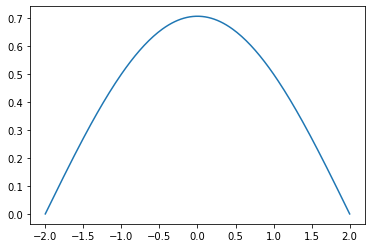

In [ ]:
import matplotlib.pyplot as plt 


plt.plot(x, psi)
plt.show()